# $Lab 2$

this time is for implement the CTFS and ICTFS, first of all the solving, we need to import the related library to be the support for the lab.

and the question is about this function:

$$
f(t) = \left\{
    \begin{matrix}
       \frac{E}{2}, &  |t| \le \frac{T_1}{4}  \\
        -\frac{E}{2}, &  \frac{T_1}{4}\le |t| \le \frac{T_1}{2} \\
    \end{matrix}
    \right.
$$
with $E = 1$ and $T_1 = 1$

In [1]:
# import the related lib we need
import numpy as np
import cmath
import matplotlib.pyplot as plt

from the lab we have finished, we can have the view that matrix product is the fastest way, so we do this lab in the same way. and the CTFS can be done as follow formula:

$$
    F_k= \frac{1}{T} \int_{t_0}^{t_0 + T_1} f(t) e^{-jkw_0t} dt
$$

while in the computer, we need to implement it in the discrete time space by the following formula. 

$$
    F_k = \frac{1}{N} \sum^{N-1}_{n = 0} f(t_0 + n\Delta t) e^{-jkw_0(t_0 + n \Delta t)}
$$

All we need to do is make it into the matrix.

In [2]:
def func_CTFS(func, T, low_bd, high_bd):
    # @func : the function you wanna convert
    # @T: the cycle for the function 
    # low_bd: the minimum k you wanna have for F_k
    # high_bd: the maximum k you wanna have for F_k
    
    k_1, k_2, K = low_bd, high_bd, high_bd - low_bd + 1
    w_0 = 2 * cmath.pi / T
    N = 1000
    deltT = T / N    
    
    f = np.arange(0, N, 1)
    f = f * deltT
    fun_vec = np.vectorize(func)
    f = fun_vec(f)
    
    w = np.arange(k_1, k_2 + 1, 1)
    w = w * w_0
    w.shape = (1, K)
    t = np.arange(0, N, 1)
    t = t * deltT
    a = np.kron(w.T, t)
    a = np.exp(- a * complex(0, 1))
    
    rv = 1.0 / N * np.dot(a, f.T)
    return rv

what we else to do is the ICTFS(inverse continuous time fourier series), by the following formula
$$
f(t) = \sum_{k = -\infty}^{\infty} F_ke^{jkw_0t}
$$
but we also have the sinusodial form like the following:
$$
f(t) = a_0 + \sum_{k = 1}^{\infty}[a_kcos(kw_0t) + b_ksin(kw_0t)] 
$$
where 
$$
a_0 = F_0 \text{  and  }
\left\{
    \begin{matrix}
        a_k = F_k + F_{-k} \\
        b_k = j(F_k - F_{-k})
    \end{matrix}
    \right. 
    (k = 1, 2, \cdots)
$$
but in the computer, it does not know the continous space, he only care the discrete space and can not express the infinity. so the we can simulate the function in a approximate way by the following.

Approximate $f(t)$ from $k_1$ to $k_2$
$$
f(t) = \sum_{k = k_1}^{k_2} F_ke^{jkw_0t}
$$

and in the discrete time interval $[t_0, t_0 + T]$ and N samples.

$$
f(t_0 + n\Delta t) = \sum_{k = k_1}^{k_2} F_ke^{jkw_0(t_0 + n\Delta t)}
$$

In [3]:
def func_ICTFS(F, k1, k2, t_min, t_max, N, w0):
    # @F: the combination of the F_k
    # @k1: k_min in the combination of F_k
    # @k2: k_max in the combination of F_k
    # @t_min: the lower bound of time interval  
    # @t_max: the upper bound of time interval
    # @N: the number of the point you wanna to have in the time interval
    # @w0: the basic frequency
    K = k2 - k1 + 1
    deltaT = (t_max - t_min) / N
    
    w = np.arange(k1, k2 + 1, 1)
    w = w * w0
    w.shape = (1, K)
    t = np.arange(0, N, 1)
    t = t * deltaT
    a = np.kron(w.T, t)
    rv = np.dot(a, F.T)
    
    return rv

## Final problem

Periodic Rectangular pulse
$$
f(t) = \left\{
    \begin{matrix}
       \frac{E}{2}, &  |t| \le \frac{T_1}{4}  \\
        -\frac{E}{2}, &  \frac{T_1}{4}\le |t| \le \frac{T_1}{2} \\
    \end{matrix}
    \right.
$$
with $E = 1$ and $T_1 = 1$

1. Plot coefficient $F_{-10}. \cdots . F_{10}$

In [4]:
#define the function we wanna to solve
def func(t):
    T1 = 1
    E = 1
    if abs(t) > T1 / 2.0:
        return func(t - T1)
    if (abs(t) < T1 / 4.0):
        return E / 2.0
    else:
        return - E / 2.0

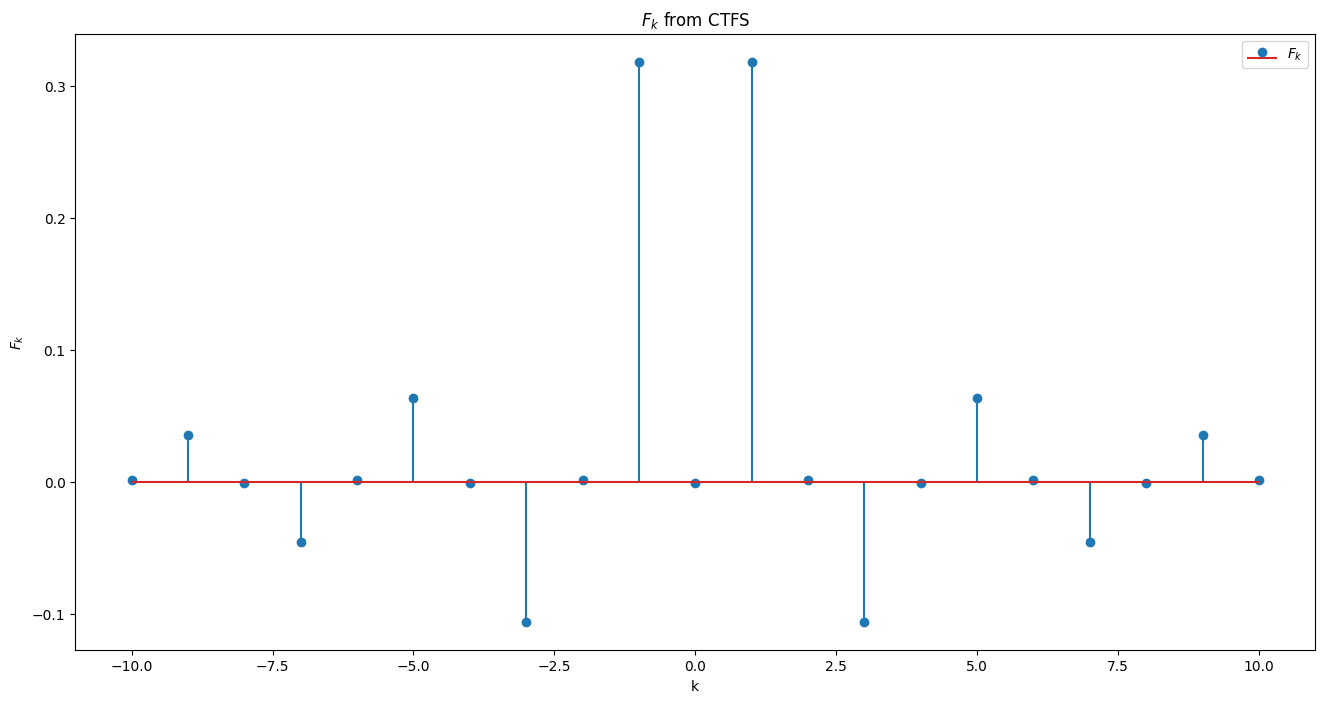

In [5]:
F = func_CTFS(func, 1.0, -10, 10)
N1 = [i for i in range(-10, 10 + 1, 1)]

plt.figure(figsize=(16, 8))
plt.stem(N1, np.real(F), label="$F_k$")
plt.xlabel("k")
plt.ylabel("$F_k$")
plt.title("$F_k$ from CTFS")
plt.legend()
plt.show()

2. plot coefficients $a_0. \cdots . a_{10}$

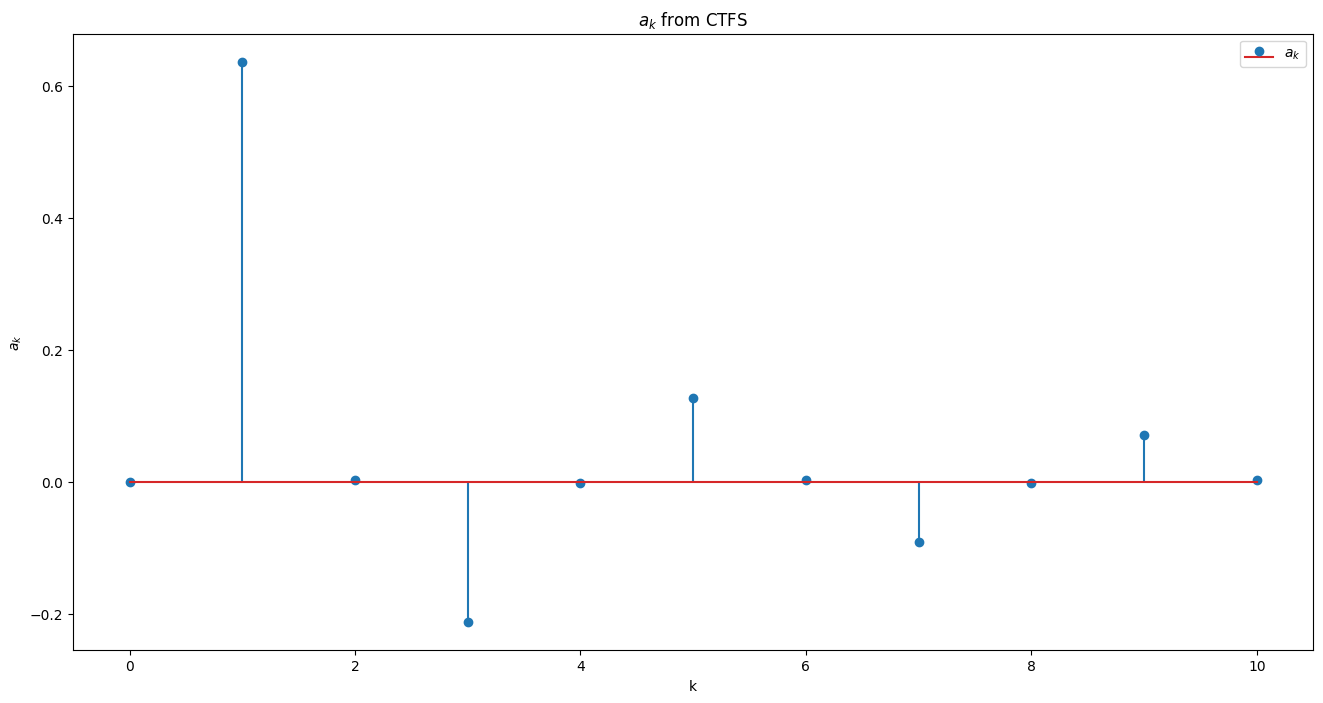

In [6]:
N2 = [i for i in range(0, 11)]
a = [F[10]]
for i in range(11, 21, 1):
    a.append(np.real(F[i]) + np.real(F[21 - i - 1]))


plt.figure(figsize=(16, 8))
plt.stem(N2, np.real(a), label="$a_k$")
plt.xlabel("k")
plt.ylabel("$a_k$")
plt.title("$a_k$ from CTFS")
plt.legend()
plt.show()

3. Recover $f_s(t)$ by using the first 5 coefficients $a_0 . \cdots . a_5$

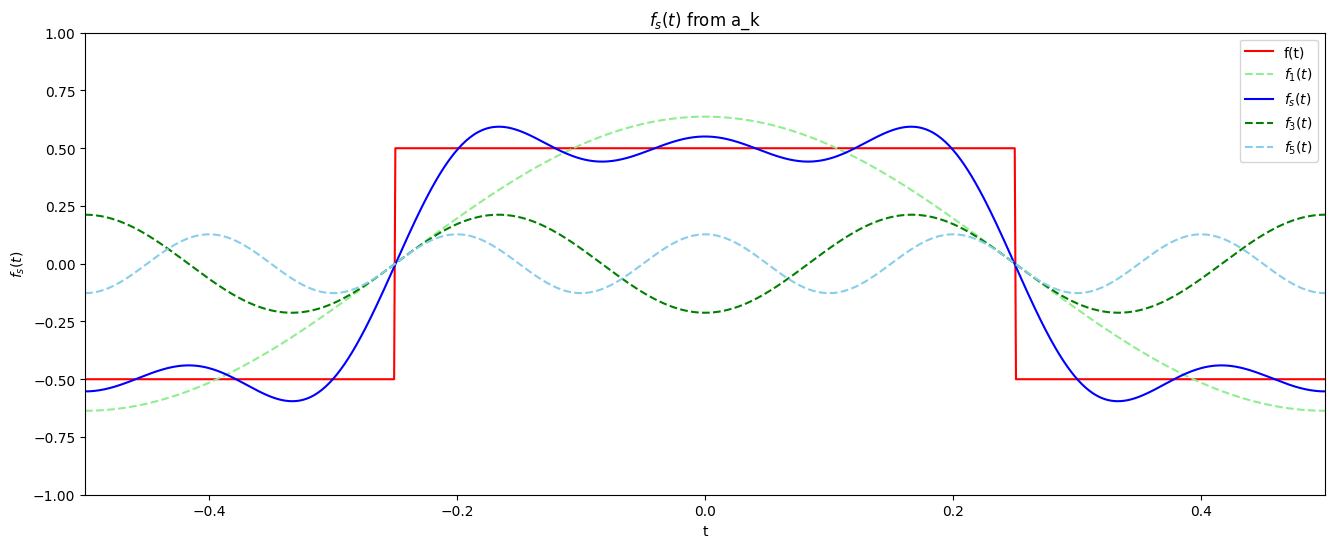

In [7]:
T1 = 1
w0 = cmath.pi * 2 / T1
N3 = np.linspace(-0.5, 0.5, 1000)
s = [np.linspace(-0.5, 0.5, 1000) for k in range(6)]
for k in range(1, 6, 1):
    s[k] = a[k] * np.cos(k * w0 * s[k])
s[0] = [a[0] for k in range(1000)]

fun_vec = np.vectorize(func)
f_t = fun_vec(N3)

fs_t = np.array([0.0 for k in range(1000)])
for i in range(6):
    fs_t +=  np.real(s[i]) 

plt.figure(figsize=(16, 6))
plt.plot(N3, f_t, label="f(t)", color="red")
plt.plot(N3, s[1], label="$f_1(t)$", color = "lightgreen", linestyle="--")
plt.plot(N3, fs_t, label="$f_s(t)$", color ="blue")
plt.plot(N3, s[3], label="$f_3(t)$", color = "green", linestyle="--")
plt.plot(N3, s[5], label="$f_5(t)$", color = "skyblue", linestyle="--")

plt.xlabel("t")
plt.ylabel("$f_s(t)$")
plt.title("$f_s(t)$ from a_k")
plt.xlim([-0.5, 0.5])
plt.ylim([-1, 1])
plt.legend()
plt.show()